<center>
    <h1>Analysis of the ICFHR 2020 Competition on Image Retrieval for Historical Handwritten Fragments (HisFrag20) Dataset</h1>
    <hr>
    <br>
    <div style="margin:0 60px 0px 0">
        <img src="./../../readme-head.png" align=center width=500>
    </div>
    <h2>Data Understanding for solving a Jigsaw Puzzle of Historical Fragments</h2>
    <h3> by Timo Bohnstedt</h3>
    <br>
</center>


<a name='0'></a>

### Outline for this Notebook `(clickable)`

1. [Data Distribution](#1) <br>
1.1. [Are the IDs meaningful? If not, where can I get more meaningful data?](#1.1) <br>
1.2. [How many writers are there?](#1.2) <br>
1.3. [How many pages do the autohers have?](#1.3) <br>
1.4. [How many fragments are there per page?](#1.3) <br>
2. [Image Analysis](#2) <br>
2.1. [How large are the fragments?](#1.2) <br>
2.2. [How does the work of an writer look like?](#1.3.)<br>
2.3. [How does a page of a particular author look like?](#1.3.)<br>
2.4. [What does it look like when an image is gradually assembled (GIF)?](#1.3.)<br>
2.5. [Optional: Is there any further information, e.g. where the pictures come from?](#1.3.)<br>

## 0. Preparation of the Notebook

In [1]:
# import packages
from os import listdir, path
from os.path import isfile, join, splitext
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image

# TODO Change code completly to pathlib for crossfunctionality
from os import listdir, path
from PIL import Image
from pathlib import Path
from cv2 import imread, copyMakeBorder, imwrite, BORDER_CONSTANT
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



import pandas as pd
from os import listdir
from os.path import isfile, join, splitext
from sklearn.model_selection import GroupShuffleSplit
import random
import csv

# prepare environtment
%matplotlib inline

# prepare plots
from helper_functions import set_size
sns.set(style="whitegrid")
plt.style.use('seaborn')
width = 496.85625

In [2]:
# declare global variables 
data_path = "/Users/beantown/PycharmProjects/jigsaw-puzzle-solver/data/hisfrag20/raw/hisfrag20"
data_path_test = "/Users/beantown/PycharmProjects/jigsaw-puzzle-solver/data/hisfrag20/raw/hisfrag20_test"

In [3]:
# load file names train dataset
file_names = [splitext(f)[0] for f in listdir(data_path) if isfile(join(data_path, f))]

# load file name test dataset
file_names_test = [splitext(f)[0] for f in listdir(data_path_test) if isfile(join(data_path_test, f))]

<a name='1'></a>

## 1. Data Distribution

<a name='1.1'></a>

### 1.1. Are the IDs meaningful? If not, where can I get more meaningful data?


The dataset contains a training and a test set with the following image naming-convention: 

```ruby
WID_PID_FID.jpg 

where 
WID = writer id
PID = page id, 
FID = fragment id.

```

The **train set** contains arround **100,000 fragments** using the Historical-IR19 as base dataset, they should all contain some text even some fragments are quite small. The **test set** contains about **20,000** new fragments

First, I will print the filename (label) to see wheather or not the label tells something meaninful

In [4]:
# For training
print(file_names[0])

# For test
print(file_names_test[0])

9121_4046_13
219_77800500_10553


As can be seen the IDs are just IDs. Some reasrch has shown that is up to now not possible to get more information about the writer. But we can cange an save the name such that it is more meaninfull in terms of the nameing convention.

<a name='1.2'></a>
### 1.2. How many writers are there?

In [5]:
# Split the image naming in wirter, page and fragment
# For training
file_names_parts = [i.split("_") for i in file_names]
# For test
file_names_test_parts = [i.split("_") for i in file_names_test]

In [6]:
# For training
df = pd.DataFrame.from_records(file_names_parts,columns=['writer_id', 'page_id','fragment_id'])
print('Within the train dataset there are {} unique writers'.format(df.nunique()[0])) 

Within the train dataset there are 8717 unique writers


In [7]:
# For test
df_test = pd.DataFrame.from_records(file_names_test_parts,columns=['writer_id', 'page_id','fragment_id'])
print('Within the test dataset there are {} unique writers'.format(df_test.nunique()[0]))

Within the test dataset there are 1152 unique writers


In [8]:
df.head()

,writer_id,page_id,fragment_id
0,9121,4046,13
1,10806,14265,19
2,11018,9037,2
3,8814,2442,8
4,8562,14999,5


<a name='1.3'></a>
### 1.3. How many pages do the writers have?

In [9]:
pages_per_writer = df.groupby('writer_id')['page_id'].nunique()
mean = pages_per_writer.mean()
median = pages_per_writer.median()
mu = pages_per_writer.std()
max_pages = pages_per_writer.max()
min_pages = pages_per_writer.min()
print(f'{mean = :.2f}\n{median = :.2f}\n{mu = :.2f}\n{max_pages = :.2f}\n{min_pages = :.2f}\n')

mean = 1.98
median = 1.00
mu = 1.61
max_pages = 5.00
min_pages = 1.00



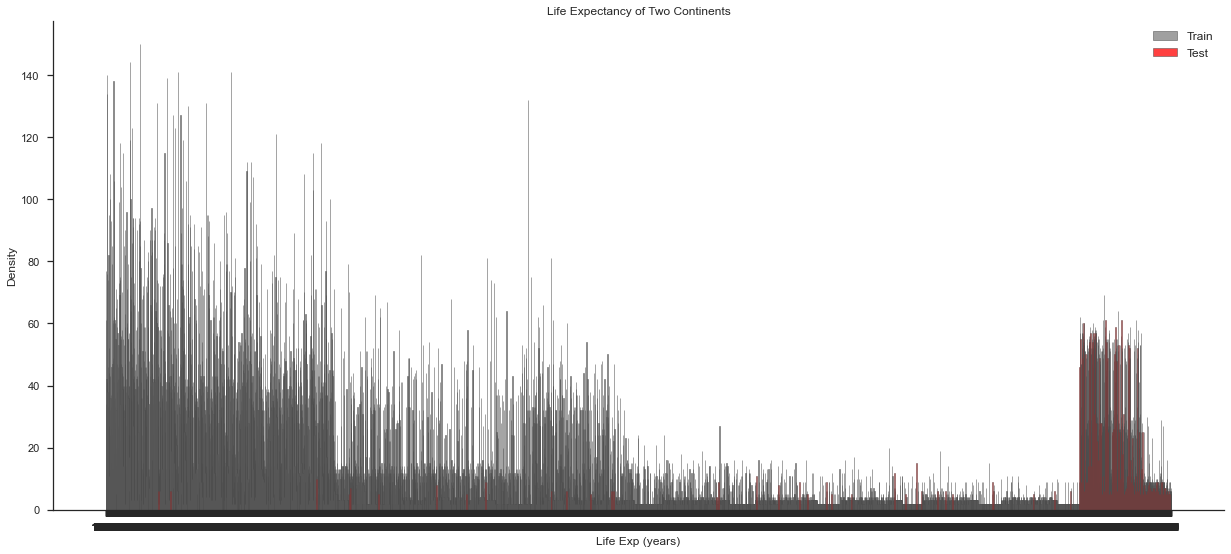

In [17]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(21, 9))
sns.despine(f)

sns.histplot(
    df,
    x="writer_id",
    palette="light:m_r",
    bins=129,
    kde=False,
    label='Train',
    color='gray'
)

sns.histplot(
    df_test,
    x="writer_id",
    palette="light:m_r",
    bins=129,
    kde=False,
    label='Test',
    color='red'
)


plt.legend(prop={'size': 12})
plt.title('Life Expectancy of Two Continents')
plt.xlabel('Life Exp (years)')
plt.ylabel('Density')
plt.show()


#ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
#ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [19]:
f.savefig('./figures/distribution.svg', format='svg', bbox_inches='tight',cmap='gray')

<ipython-input-19-4ec727cdf241>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "cmap" which is no longer supported as of 3.3 and will become an error two minor releases later
  f.savefig('./figures/distribution.svg', format='svg', bbox_inches='tight',cmap='gray')


<a name='1.4'></a>
### 1.4. How many fragments are there per page?

In [ ]:
fragments_per_page = df.groupby('page_id')['fragment_id'].nunique()
mean = fragments_per_page.mean()
median = fragments_per_page.median()
mu = fragments_per_page.std()
max_pages = fragments_per_page.max()
min_pages = fragments_per_page.min()
print(f'{mean = :.2f}\n{median = :.2f}\n{mu = :.2f}\n{max_pages = :.2f}\n{min_pages = :.2f}\n')

<a name='2'></a>

## 2. Image Analysis

<a name='2.1'></a>
### 2.1. How large are the fragments?

In [ ]:
sns.set(style="white")
fig = plt.figure(figsize=(21, 21))
fig.tight_layout(pad=0.4, w_pad=5, h_pad=2)
columns = 3
rows = 3

# ax enables access to manipulate each of subplots
ax = []

for i in range(columns*rows):
    # define filename
    filename = data_path +'/' + file_names[i] + '.jpg'
    img = Image.open(filename)
    # create subplot and append to ax
    ax.append( fig.add_subplot(rows, columns, i+1) )
    # set title
    ax[-1].set_title('wrtiter: '+file_names_parts[i][0] +'\n' + 'page: '+file_names_parts[i][1] + '\n' + 
    'fragment: '+file_names_parts[i][2])  
    #plot the img
    plt.imshow(img)

plt.show()  # finally, render the plot

<a name='2.2'></a>
### 2.2. How does the work of a writer look like?

In [ ]:
# get a random writer which has three pages
writers_w_three_pages = pages_per_writer[pages_per_writer ==3]
rand_writer = writers_w_three_pages.to_frame().sample().index[0]
print(rand_writer)

In [ ]:
# get df with writers work items
writer_df = df[df['writer_id'] == rand_writer]
writer_df = writer_df.astype(int)
writer_df = writer_df.sort_values(['page_id','fragment_id'])

In [ ]:
# drop writer coll because it it not neccesary
writer_df = writer_df.drop(['writer_id'], axis=1)

In [ ]:
# drop writer and add a col for coll id (row id = fragment_id)
_,idx = np.unique(writer_df['page_id'],return_inverse=True) 
writer_df['col_id'] = idx
writer_df['row_id'] = df['fragment_id']
writer_df = writer_df.set_index(['col_id','row_id'])


In [ ]:
# get value of nrows by the number of fragments
nrows = writer_df['fragment_id'].max() +1
print(nrows)

In [ ]:
ncols = 3  # array of sub-plots
figsize = [21, nrows * 7]     # figure size, inches

In [ ]:
# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
fig.tight_layout(pad=0.4, w_pad=5, h_pad=2)

for i, axi in enumerate(ax.flat):
    # get indices of row/column
    rowid = i // ncols
    colid = i % ncols
    current_row = writer_df.query("col_id == {} and row_id == '{}'".format(colid,rowid))
    try:
        current_page = current_row['page_id'].astype(str).values[0]
        current_fragment = current_row['fragment_id'].astype(str).values[0]
        filename = data_path +'/' + rand_writer + '_' + current_page + '_' + current_fragment + '.jpg'
        img = Image.open(filename)    
        axi.imshow(img)
        # write row/col indices as axes' title for identification
        axi.set_title('Writer: {}\nPage: {}\n Fragment: {}'.format(rand_writer,current_page,current_fragment))
    except:
        axi.set_visible(False)
        
plt.show()

fig.savefig('readme-data.svg', format='svg', bbox_inches='tight',cmap='gray')

# Analaysis of the size

In [ ]:
train_path = '/Users/beantown/PycharmProjects/jigsaw-puzzle-solver/data/hisfrag20/raw/hisfrag20/'
test_path = '/Users/beantown/PycharmProjects/jigsaw-puzzle-solver/data/hisfrag20/raw/hisfrag20_test/'

def get_filenames(train_path, test_path):
    # load file names train dataset
    train = [path.splitext(f)[0] for f in listdir(train_path) if path.isfile(path.join(train_path, f))]

    # load file name test dataset
    test = [path.splitext(f)[0] for f in listdir(test_path) if path.isfile(path.join(test_path, f))]
    
    return train, test

In [ ]:
def get_imgsize(train_filenames, test_filenames, train_path, test_path):
    train = [Image.open(train_path + f + '.jpg', 'r').size for f in train_filenames]
    test = [Image.open(test_path + f + '.jpg', 'r').size for f in test_filenames]
    return train, test

In [ ]:
train_filenames, test_filenames = get_filenames(train_path, test_path)
train_size, test_size = get_imgsize(train_filenames, test_filenames, train_path, test_path)
train_size = np.array(train_size)
test_size = np.array(test_size)train_df = pd.DataFrame(train_size, columns=['x','y'])
test_df = pd.DataFrame(test_size, columns=['x','y'])
#print
train_df.x.mean()
train_df.y.mean()
df = pd.concat([test_df, train_df])
fig = px.histogram(train_df, x="x", title='Training Data Size x-Axis')
fig.show()

In [ ]:
fig = px.box(train_df, x="x", title='Training Data Size x-Axis')
fig.show()

In [ ]:
fig = px.box(train_df, x="y", title='Training Data Size y-Axis')
fig.show()

In [ ]:
fig = px.histogram(test_df, x="x", title='Test Data Size x-Axis')
fig.show()

In [ ]:
fig = px.box(test_df, x="x", title='Test Data Size x-Axis')
fig.show()

In [ ]:
fig = px.histogram(test_df, x="y", title='Test Data Size y-Axis')
fig.show()

In [ ]:
fig = px.box(test_df, x="y", title='Test Data Size y-Axis')
fig.show()

# Preproceccing

In [ ]:
train_path = '/Users/beantown/PycharmProjects/jigsaw-puzzle-solver/data/hisfrag20/raw/hisfrag20/'
test_path = '/Users/beantown/PycharmProjects/jigsaw-puzzle-solver/data/hisfrag20/raw/hisfrag20_test/'
result_path = '/Users/beantown/PycharmProjects/jigsaw-puzzle-solver/data/hisfrag20/prepared/paris_as_csv/'

In [ ]:
def get_info(data_path):
    '''Helper Method which provids the path onto you local machine and the fragment ID, such that pairs can be created'''
    # load file names train dataset
    file_names = [splitext(f)[0] for f in listdir(data_path) if isfile(join(data_path, f))]

    # load file name test dataset
    #file_names_test = [splitext(f)[0] for f in listdir(data_path_test) if isfile(join(data_path_test, f))]

    # Split the image naming in wirter, page and fragment
    # For training
    #file_names_parts = [i.split("_") for i in file_names]
    # For test
    file_names_parts = [i.split("_") for i in file_names]
    df = pd.DataFrame.from_records(file_names_parts,columns=['writer_id', 'ID_of_original_papyrus','fragment_id'])
    df['path_to_fragment_image'] = file_names
    df['path_to_fragment_image'] = data_path +  df['path_to_fragment_image'].astype(str)
    return df[['path_to_fragment_image', 'ID_of_original_papyrus']]

df = get_info(data_path=train_path)

In [ ]:
gs = GroupShuffleSplit(n_splits=2, test_size=.2, random_state=0)
train_idx, val_idx = next(gs.split(df, groups=df.ID_of_original_papyrus))

In [ ]:
train = df.loc[train_idx]
val = df.loc[val_idx]

In [ ]:
train.ID_of_original_papyrus.isin(val.ID_of_original_papyrus).any()
test = get_info(data_path=test_path)

In [ ]:
train.ID_of_original_papyrus.isin(test.ID_of_original_papyrus).any()
val.ID_of_original_papyrus.isin(test.ID_of_original_papyrus).any()

In [ ]:
def sample_pairs(K, data, IDList):
    """
    used from: https://github.com/plnicolas/master-thesis/blob/master/Papy-S-Net/PairGenerator.py
    Function to create fragment pairs given a Pandas DataFrame and a list of IDs.
    Parameters:
    ----------
        - K: The number of pairs of each type (positive and negative) to sample. Duplicates will be dropped,
        so the final number of pairs WILL be smaller than 2K
        - Data: Pandas DataFrame with rows of the form [path_to_fragment_image, ID_of_original_papyrus]
        - IDList: List containing the IDs of the papyri to sample fragments from
    Returns:
    --------
        - pairs: A list of fragment pairs, of the form [path_to_frag1, path_to_frag2]
        - labels: A list of labels, i.e. original papyrus IDs
    """

    pairs = []
    labels = []

    # For each papyrus used for training
    for index in IDList:
        isIndex = data.iloc[:, 1] == index
        isNotIndex = data.iloc[:, 1] != index
        # List of images from the indexed papyrus
        indexTrueList = data[isIndex].iloc[:, 0]
        # List of images NOT from the indexed papyrus
        indexFalseList = data[isNotIndex].iloc[:, 0]

        # K negative pairs
        p1List = indexTrueList.sample(n=K, replace=True, random_state=356)
        p2List = indexFalseList.sample(n=K, replace=True, random_state=323)
        for k in range(K):
            pair = [p1List.values[k], p2List.values[k]]
            if pair not in pairs:
                pairs.append(pair)
                labels.append(1)

        # K positive pairs
        p1List = indexTrueList.sample(n=K, replace=True, random_state=362)
        p2List = indexTrueList.sample(n=K, replace=True, random_state=316)
        for k in range(K):
            pair = [p1List.values[k], p2List.values[k]]
            if pair not in pairs:
                pairs.append(pair)
                labels.append(0)

    # Shuffle the pairs and label lists before returning them
    # The two lists are shuffled at once with the same order, of course
    tmp = list(zip(pairs, labels))
    random.shuffle(tmp)
    pairs, labels = zip(*tmp)

    return pairs, labels

In [ ]:
X_train, y_train = sample_pairs(K=2, data=train, IDList=train.ID_of_original_papyrus.unique())
X_val, y_val = sample_pairs(K=2, data=val, IDList=val.ID_of_original_papyrus.unique())
X_test, y_test = sample_pairs(K=2, data=test, IDList=test.ID_of_original_papyrus.unique())

train = pd.DataFrame(X_train)
train['y'] = y_train
#train.to_csv(result_path + 'train.csv', index=False)

val = pd.DataFrame(X_val)
val['y'] = y_val
#val.to_csv(result_path + 'val.csv', index=False)

test = pd.DataFrame(X_test)
test['y'] = y_test
test.to_csv(result_path + 'test.csv', index=False)